<a href="https://colab.research.google.com/github/ayushs0911/NLP-Projects/blob/main/Named_Entity_Recognition_with_Roberta_using_Huggingface_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installation and Imports

In [1]:
!pip install transformers datasets evaluate
!pip install seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [2]:
import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import re
import string
import evaluate
import time
from numpy import random
import gensim.downloader as api
from PIL import Image
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Dense,Flatten,InputLayer,BatchNormalization,Dropout,Input,LayerNormalization
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from google.colab import drive
from google.colab import files
from datasets import load_dataset
from transformers import (BertTokenizerFast,TFBertTokenizer,BertTokenizer,RobertaTokenizerFast,DataCollatorForTokenClassification,
                          DataCollatorWithPadding,TFRobertaForSequenceClassification,TFBertForSequenceClassification,
                          TFBertModel,create_optimizer,TFRobertaForTokenClassification,TFAutoModelForTokenClassification,)

# Dataset prepration 

In [3]:
dataset = load_dataset("conll2003")

Generating train split:   0%|          | 0/14041 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3453 [00:00<?, ? examples/s]

Dataset conll2003 downloaded and prepared to /root/.cache/huggingface/datasets/conll2003/conll2003/1.0.0/9a4d16a94f8674ba3466315300359b0acd891b68b6c8743ddf60b9c702adce98. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})

In [5]:
dataset['train'][0]

{'id': '0',
 'tokens': ['EU',
  'rejects',
  'German',
  'call',
  'to',
  'boycott',
  'British',
  'lamb',
  '.'],
 'pos_tags': [22, 42, 16, 21, 35, 37, 16, 21, 7],
 'chunk_tags': [11, 21, 11, 12, 21, 22, 11, 12, 0],
 'ner_tags': [3, 0, 7, 0, 0, 0, 7, 0, 0]}

In [6]:
model_id = "roberta-base"
tokenizer = RobertaTokenizerFast.from_pretrained(model_id,
                                                 add_prefix_space = True ) # pretokenised inputs 


In [7]:
inputs = tokenizer(dataset['train'][20]['tokens'], is_split_into_words = True)
inputs.tokens()

['<s>',
 'ĠRare',
 'ĠHend',
 'rix',
 'Ġsong',
 'Ġdraft',
 'Ġsells',
 'Ġfor',
 'Ġalmost',
 'Ġ$',
 'Ġ17',
 ',',
 '000',
 'Ġ.',
 '</s>']

word_ids keep information of sub-word w.r.t original word. 

In [8]:
inputs.word_ids()

[None, 0, 1, 1, 2, 3, 4, 5, 6, 7, 8, 8, 8, 9, None]

In [9]:
print(dataset['train'][20])

{'id': '20', 'tokens': ['Rare', 'Hendrix', 'song', 'draft', 'sells', 'for', 'almost', '$', '17,000', '.'], 'pos_tags': [22, 22, 21, 21, 42, 15, 30, 3, 11, 7], 'chunk_tags': [11, 12, 12, 12, 21, 13, 11, 12, 12, 0], 'ner_tags': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]}


We have to modify `ner_tags` for new tokens. 

In [10]:
print(inputs.word_ids())
print(dataset['train'][20]['ner_tags'])

[None, 0, 1, 1, 2, 3, 4, 5, 6, 7, 8, 8, 8, 9, None]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


The given code defines a function called `align_labels_with_tokens` that takes two parameters: `labels` and `word_ids`. This function aligns the labels with corresponding tokens based on the provided word IDs.

Here's a step-by-step explanation of what the code does:

1. It initializes an empty list called `new_labels` to store the aligned labels.

2. It initializes a variable called `current_word` to keep track of the current word ID. Initially, it is set to `None`.

3. The code iterates over each `word_id` in the `word_ids` list.

4. Inside the loop, it checks if the current `word_id` is different from the `current_word`. If it is different, it means the loop has moved to a new word.

5. For a new word, it updates the `current_word` variable to the current `word_id` value.

6. It retrieves the corresponding label for the `word_id` from the `labels` list. If the `word_id` is `None`, it sets the label to -100. This is done to handle special tokens in the input sequence.

7. The obtained label is then appended to the `new_labels` list.

8. If the `word_id` is not different from the `current_word` (i.e., it is the same word as the previous token), it checks if the `word_id` is `None`.

9. If the `word_id` is `None`, it means a special token is encountered, so it appends -100 to the `new_labels` list.

10. If the `word_id` is not `None`, it means it is the same word as the previous token, and it retrieves the label for that `word_id` from the `labels` list.

11. If the label is of the form B-XXX (indicating the beginning of a named entity), it changes it to I-XXX (indicating the continuation of a named entity) by adding 1 to the label value.

12. The modified label is then appended to the `new_labels` list.

13. After processing all the `word_ids`, the `new_labels` list contains the aligned labels corresponding to the provided word IDs.

14. Finally, the `new_labels` list is returned as the output of the function.

In summary, the function takes a list of labels and a list of word IDs, and it aligns the labels with the tokens represented by the word IDs, making adjustments for special tokens and named entity labels.

In [11]:
def align_labels_with_tokens(labels, word_ids):
    new_labels = []
    current_word = None
    for word_id in word_ids:
        if word_id != current_word:
            # Start of a new word!
            current_word = word_id
            label = -100 if word_id is None else labels[word_id]
            new_labels.append(label)
        elif word_id is None:
            # Special token
            new_labels.append(-100)
        else:
            # Same word as previous token
            label = labels[word_id]
            # If the label is B-XXX we change it to I-XXX
            if label % 2 == 1:
                label += 1
            new_labels.append(label)

    return new_labels

In [12]:
labels = dataset['train'][20]["ner_tags"]
word_ids = inputs.word_ids()
print(labels)
print(align_labels_with_tokens(labels, word_ids))

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[-100, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -100]


In [13]:
def tokenizer_function(dataset):
  out = tokenizer(dataset['tokens'], truncation = True, is_split_into_words = True)
  out['labels'] = align_labels_with_tokens(dataset['ner_tags'], out.word_ids())
  return out


In [14]:
tokenized_dataset = dataset.map(tokenizer_function, 
                                remove_columns = ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'])

Map:   0%|          | 0/14041 [00:00<?, ? examples/s]

Map:   0%|          | 0/3250 [00:00<?, ? examples/s]

Map:   0%|          | 0/3453 [00:00<?, ? examples/s]

In [15]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 3453
    })
})

In [16]:
tokenized_dataset['train'][20]

{'input_ids': [0,
  28751,
  16544,
  15072,
  2214,
  2479,
  7683,
  13,
  818,
  68,
  601,
  6,
  151,
  479,
  2],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'labels': [-100, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -100]}

In [17]:
data_collator = DataCollatorForTokenClassification(
    tokenizer = tokenizer, return_tensors = "tf"
)

In [18]:
tf_train_dataset = tokenized_dataset['train'].to_tf_dataset(
    collate_fn = data_collator,
    shuffle = True,
    batch_size = 32
)

You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [19]:
tf_val_dataset = tokenized_dataset['validation'].to_tf_dataset(
    collate_fn = data_collator,
    shuffle = False, 
    batch_size = 32
)

In [20]:
for i in tf_train_dataset.take(1):
  print(i)

{'input_ids': <tf.Tensor: shape=(32, 53), dtype=int64, numpy=
array([[    0,  3921, 28981, ...,     2,     1,     1],
       [    0, 21226,  2389, ...,     1,     1,     1],
       [    0,  6974,   271, ...,     1,     1,     1],
       ...,
       [    0, 13910,  3376, ...,     1,     1,     1],
       [    0,    20,  1763, ...,     1,     1,     1],
       [    0,  5105, 11026, ...,     1,     1,     1]])>, 'attention_mask': <tf.Tensor: shape=(32, 53), dtype=int64, numpy=
array([[1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])>, 'labels': <tf.Tensor: shape=(32, 53), dtype=int64, numpy=
array([[-100,    0,    0, ..., -100, -100, -100],
       [-100,    0,    0, ..., -100, -100, -100],
       [-100,    0,    0, ..., -100, -100, -100],
       ...,
       [-100,    0,    0, ..., -100, -100, -100],
       [-100,    0,    0, ..., -100, -100, -

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:718: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)


In [21]:
model = TFRobertaForTokenClassification.from_pretrained(
    model_id,
    num_labels = 9
)

All model checkpoint layers were used when initializing TFRobertaForTokenClassification.

Some layers of TFRobertaForTokenClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
model.summary()

Model: "tf_roberta_for_token_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 roberta (TFRobertaMainLayer  multiple                 124055040 
 )                                                               
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  6921      
                                                                 
Total params: 124,061,961
Trainable params: 124,061,961
Non-trainable params: 0
_________________________________________________________________


In [23]:
NUM_EPOCHS=2
batches_per_epoch = len(tokenized_dataset['train'])// 16 # batch size
total_train_steps = int(batches_per_epoch*NUM_EPOCHS)

In [24]:
optimizer, schedule = create_optimizer(init_lr=2e-5,
                                       num_warmup_steps=0, 
                                       num_train_steps=total_train_steps,)

In [25]:
model.compile(optimizer=optimizer,)


No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


In [26]:
history=model.fit(
    tf_train_dataset,
    validation_data=tf_val_dataset,
    epochs=NUM_EPOCHS,)

Epoch 1/2
439/439 [==============================] - 253s 456ms/step - loss: 0.2122 - val_loss: 0.0577
Epoch 2/2
439/439 [==============================] - 175s 399ms/step - loss: 0.0530 - val_loss: 0.0478


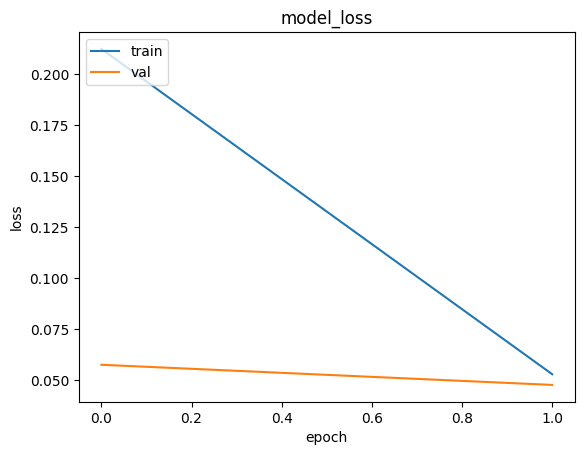

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Testing

In [34]:
inputs=tokenizer(["Wake Up JoeMarshal, you just got a call from UNESCO for a trip to India"], padding=True,return_tensors="tf")

In [35]:
print(inputs.tokens())
print(inputs.word_ids())
print(inputs['input_ids'])

['<s>', 'ĠWake', 'ĠUp', 'ĠJoe', 'Marsh', 'al', ',', 'Ġyou', 'Ġjust', 'Ġgot', 'Ġa', 'Ġcall', 'Ġfrom', 'ĠUNESCO', 'Ġfor', 'Ġa', 'Ġtrip', 'Ġto', 'ĠIndia', '</s>']
[None, 0, 1, 2, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, None]
tf.Tensor(
[[    0 11601  3105  2101 40825   337     6    47    95   300    10   486
     31 26688    13    10  1805     7   666     2]], shape=(1, 20), dtype=int32)


In [36]:
ind_to_label={0:'O', 1:'B-PER',2:'I-PER',3:'B-ORG',4:'I-ORG',5:'B-LOC',6:'I-LOC',7:'B-MISC',8:'I-MISC'}
out_str=""
current_index=0

In [37]:
for i in range(1,len(inputs.tokens())-1):
  if tf.argmax(logits,axis=-1)[0][i]!=0:
    out_str+=" "+str(inputs.tokens()[i])+"--->"+str(ind_to_label[tf.argmax(logits,axis=-1).numpy()[0][i]])
  else:
    out_str+=" "+str(inputs.tokens()[i])

In [38]:
print(out_str.replace("Ġ",""))

 Wake Up Joe Marsh al ,--->B-PER you just got a call from UNESCO for a trip to India--->B-PER


#Evaluation

In [27]:
metric = evaluate.load("seqeval")

In [30]:
ind_to_label={0:'O', 1:'B-PER',2:'I-PER',3:'B-ORG',4:'I-ORG',5:'B-LOC',6:'I-LOC',7:'B-MISC',8:'I-MISC'}
all_predictions = []
all_labels = []

In [31]:
for batch in tf_val_dataset:
  logits = model.predict(batch)['logits']
  labels = batch['labels'].numpy()
  predictions = tf.argmax(logits, axis = -1).numpy()

  for prediction, label in zip(predictions, labels):
    for predicted_idx, label_idx in zip(prediction, label):
      if label_idx == -100:
        continue 
      all_predictions.append(ind_to_label[predicted_idx])
      all_labels.append(ind_to_label[label_idx])

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:718: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)


1/1 [==============================] - 4s 4s/step


In [1]:
# print(all_predictions)
# print(all_labels)

In [33]:
metric.compute(predictions=[all_predictions], 
               references=[all_labels])

{'LOC': {'precision': 0.9473684210526315,
  'recall': 0.979858464888405,
  'f1': 0.9633395772009633,
  'number': 1837},
 'MISC': {'precision': 0.8353783231083844,
  'recall': 0.886117136659436,
  'f1': 0.86,
  'number': 922},
 'ORG': {'precision': 0.9174721189591079,
  'recall': 0.9202087994034303,
  'f1': 0.9188384214445271,
  'number': 1341},
 'PER': {'precision': 0.9730167296276309,
  'recall': 0.9788273615635179,
  'f1': 0.975913396481732,
  'number': 1842},
 'overall_precision': 0.9305464121132324,
 'overall_recall': 0.9515314708852238,
 'overall_f1': 0.9409219504077218,
 'overall_accuracy': 0.9876959896904053}